# PySDR初探

## 测试连接

In [1]:
import adi
sdr = adi.Pluto('ip:192.168.2.1') # or whatever your Pluto's IP is
sdr.sample_rate = int(2.5e6)
sdr.rx()

array([-42.+32.j,  11. -1.j, -25. +0.j, ..., -26.-20.j,  11.+10.j,
         3. -7.j])

## 测试接收信号

In [2]:
import adi
import numpy as np

# 创建PlutoSDR对象
sdr = adi.Pluto('ip:192.168.2.1')

# 设置采样率和中心频率
sdr.sample_rate = 1000000  # 1 MSPS
sdr.rx_lo = 1000000000     # 1 GHz

# 设置接收通道
sdr.rx_rf_bandwidth = 2000000  # 2 MHz

# 开始采集数据
num_samples = 1024
data = sdr.rx()
print("采集到的数据：", data)

# 将数据保存到文件
np.save("pluto_data.npy", data)


采集到的数据： [  46. -40.j  -19. -12.j   21. -15.j ... -119.  -2.j  -38.+133.j
   79. +87.j]


## 采集信号

In [5]:
import numpy as np
import adi

sample_rate = 1e6 # Hz
center_freq = 100e6 # Hz
num_samps = 10000 # number of samples returned per call to rx()

sdr = adi.Pluto('ip:192.168.2.1')
sdr.gain_control_mode_chan0 = 'manual'
sdr.rx_hardwaregain_chan0 = 70.0 # dB
sdr.rx_lo = int(center_freq)
sdr.sample_rate = int(sample_rate)
sdr.rx_rf_bandwidth = int(sample_rate) # filter width, just set it to the same as sample rate for now
sdr.rx_buffer_size = num_samps

samples = sdr.rx() # receive samples off Pluto
print(samples[0:10])

[49.-18.j 61.-17.j 64.-28.j 45. -8.j 48. -4.j 46.-10.j 39.-12.j 49.-17.j
 69. -7.j 49.-25.j]


## 显示频谱

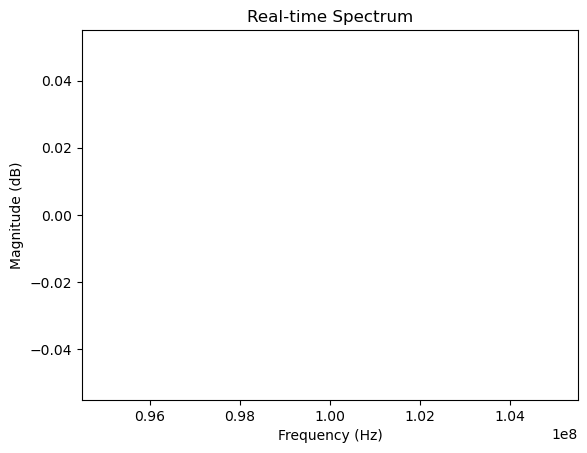

In [7]:
import adi
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_realtime_spectrum(pluto, center_freq, span, num_points):
    # 设置PlutoSDR参数
    pluto.rx_lo = int(center_freq)
    pluto.rx_rf_bandwidth = int(span)
    pluto.sample_rate = int(span) * 2  # 采样率为RF带宽的两倍

    # 创建图形
    fig, ax = plt.subplots()
    x = np.linspace(center_freq - span/2, center_freq + span/2, num_points)
    line, = ax.plot(x, np.zeros_like(x))

    # 更新函数
    def update(frame):
        data = pluto.rx()
        fft_data = np.fft.fft(data)
        fft_mag = np.abs(fft_data)
        fft_mag_db = 10 * np.log10(fft_mag)
        line.set_ydata(fft_mag_db)
        return line,

    # 开始动画
    ani = FuncAnimation(fig, update, frames=range(100), blit=True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Real-time Spectrum')
    plt.show()

# 创建PlutoSDR对象
pluto = adi.Pluto('ip:192.168.2.1')

# 指定频率范围和参数
center_freq = 100e6  # 中心频率 100 MHz
span = 10e6  # 频率范围 10 MHz
num_points = 1024  # FFT点数

# 实时显示频谱图
plot_realtime_spectrum(pluto, center_freq, span, num_points)
